In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import statsmodels.api as sm

## Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.

The aim is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

In [2]:
train = pd.read_csv(r"D:\GreatLearning\big-mart-sales-prediction\Train.csv")

In [3]:
test = pd.read_csv(r"D:\GreatLearning\big-mart-sales-prediction\Test.csv")

In [4]:
data = pd.concat([train,test],sort = False, ignore_index=True)

In [5]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
answer = pd.read_csv(r"D:\GreatLearning\big-mart-sales-prediction\Submission.csv")

In [7]:
answer.head()

,Unnamed: 0,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,0,FDW58,OUT049,1636.244023
1,1,FDW14,OUT017,1409.355910
2,2,NCN55,OUT010,710.594286
3,3,FDQ58,OUT017,2355.184955
4,4,FDY38,OUT027,5857.916205


In [8]:
data.shape

(14204, 12)

In [9]:
train.shape

(8523, 12)

In [10]:
test.shape

(5681, 11)

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [12]:
train.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [13]:
corr_matrix=train.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [14]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [15]:
data.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
data.Item_Fat_Content.replace(to_replace=['Low Fat','low fat', 'LF'],value=['Low Fat']*3,inplace=True)

In [17]:
data.Item_Fat_Content.replace(to_replace=['Regular','reg'],value=['Regular']*2,inplace=True)

In [18]:
#Univariate Analysis

In [19]:
train.Outlet_Establishment_Year.unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [20]:
train['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

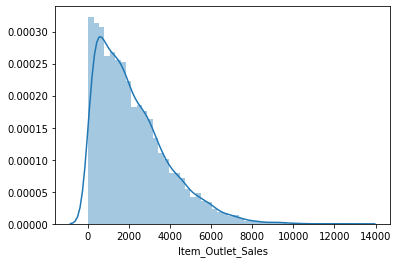

In [21]:
sns.distplot(train.Item_Outlet_Sales)

In [22]:
from scipy import stats as sm
sm.shapiro(train.Item_Outlet_Sales)

C:\Users\Navika\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1653: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


(0.9094116687774658, 0.0)

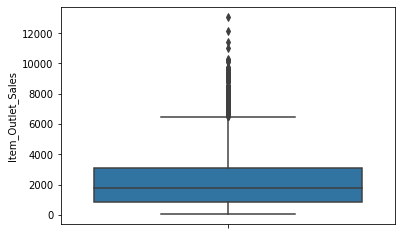

In [23]:
sns.boxplot(y=train.Item_Outlet_Sales)

In [24]:
#------------------------------------------

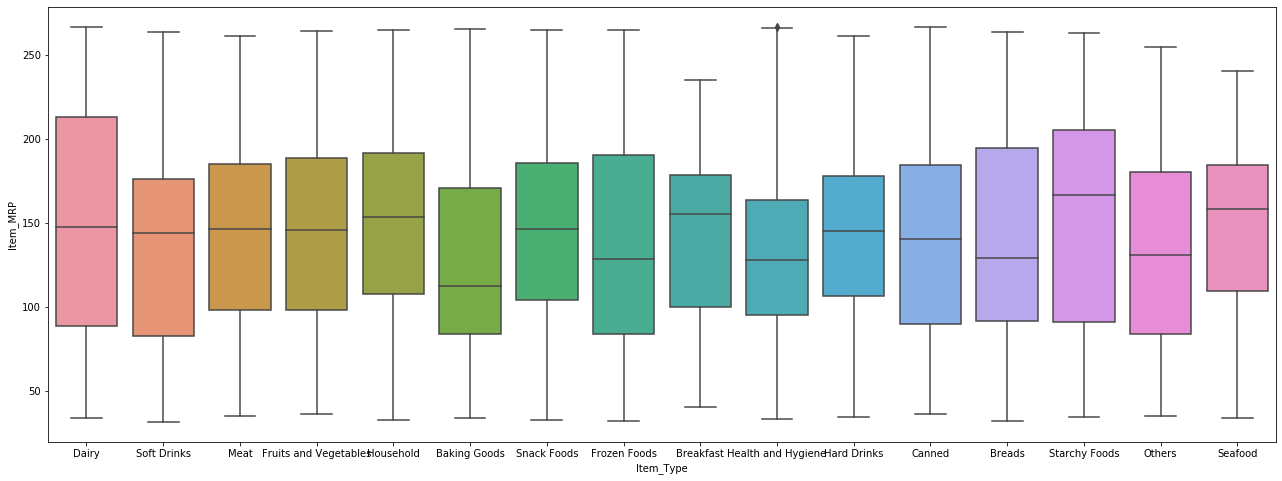

In [25]:
plt.figure(figsize=(22,8))
sns.boxplot(train.Item_Type,y=train.Item_MRP)

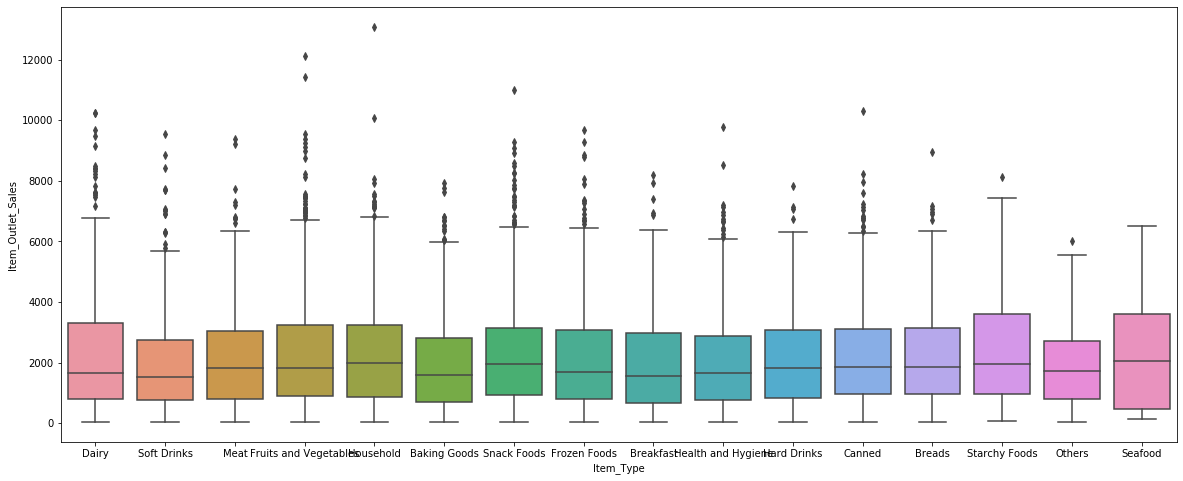

In [26]:
plt.figure(figsize=(20,8))
sns.boxplot(train.Item_Type,y=train.Item_Outlet_Sales)

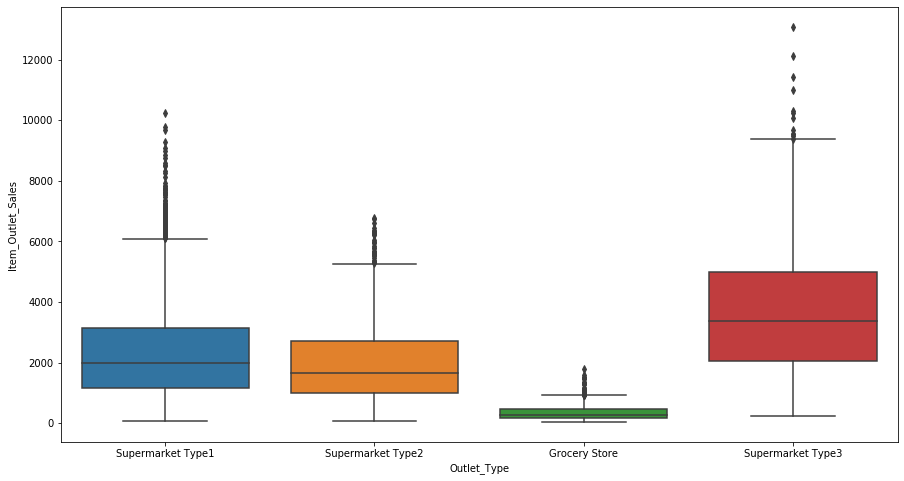

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Type,y=train.Item_Outlet_Sales)

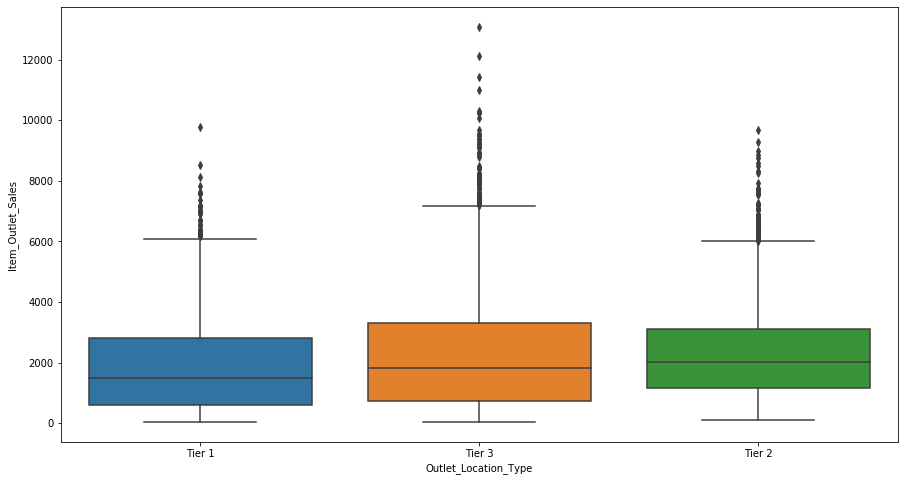

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Location_Type,y=train.Item_Outlet_Sales)

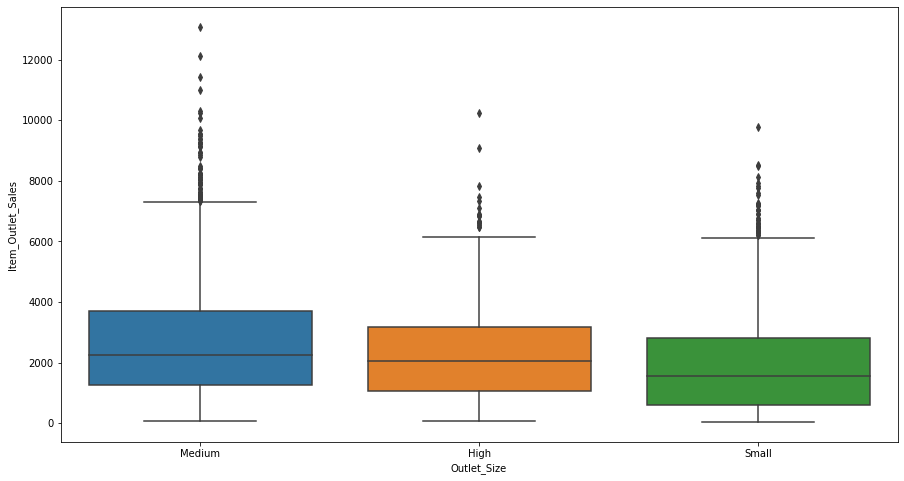

In [29]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Size,y=train.Item_Outlet_Sales)

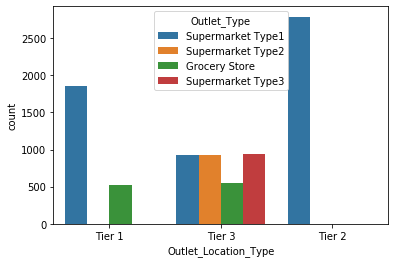

In [30]:
sns.countplot(train.Outlet_Location_Type,hue=train.Outlet_Type)

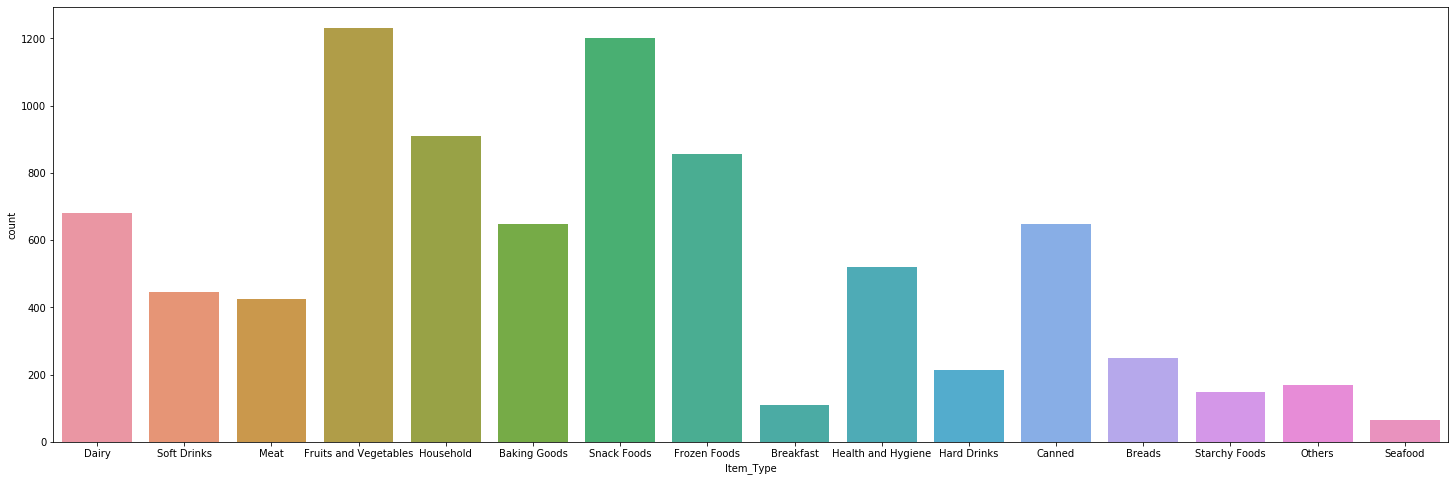

In [31]:
plt.figure(figsize=(25,8))
sns.countplot(train.Item_Type)

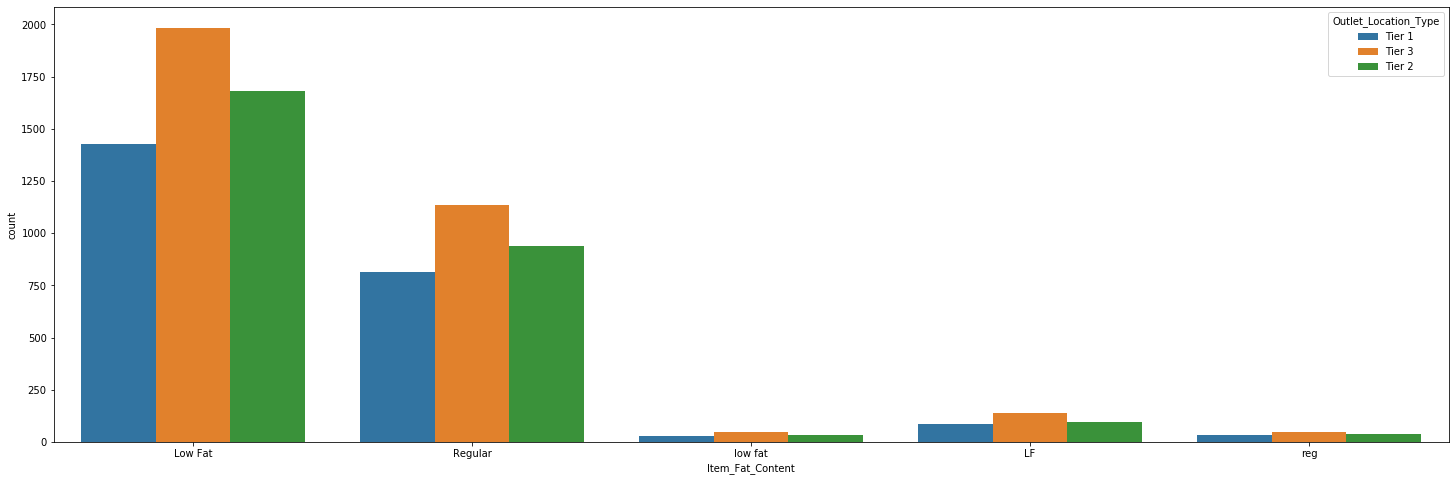

In [32]:
plt.figure(figsize=(25,8))
sns.countplot(train.Item_Fat_Content,hue=train.Outlet_Location_Type)

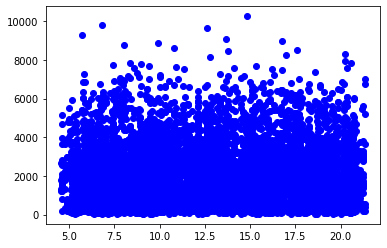

In [33]:
# Item Weight vs Sales
plt.scatter(train.Item_Weight, 
            train.Item_Outlet_Sales, color = "blue")

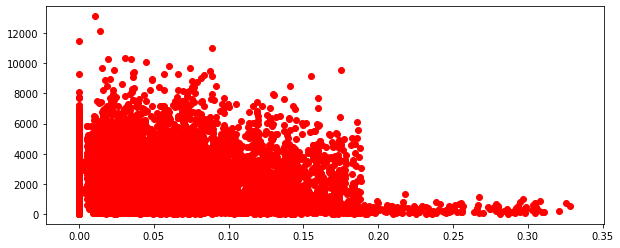

In [34]:
# Item Visibility vs Sales
plt.figure(figsize = [10,4])
plt.scatter(train.Item_Visibility, 
            train.Item_Outlet_Sales, color = "red")

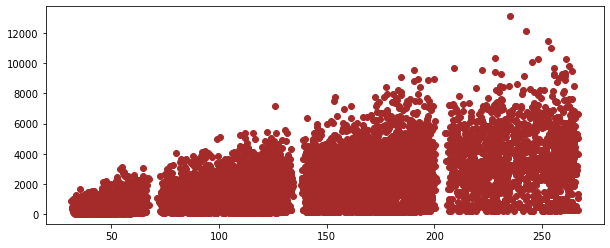

In [35]:
# Item MRP vs Sales
plt.figure(figsize = [10,4])
plt.scatter(x=train.Item_MRP, 
            y=train.Item_Outlet_Sales, color = "brown")

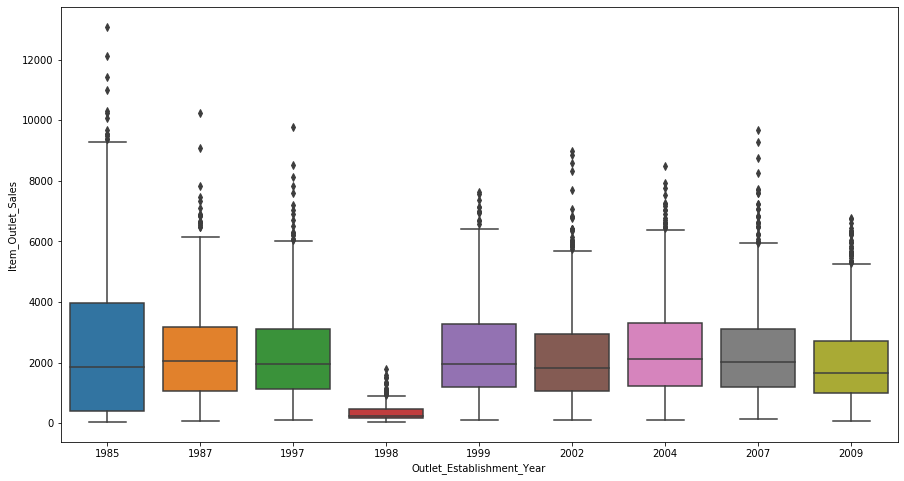

In [36]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Establishment_Year,y=train.Item_Outlet_Sales)

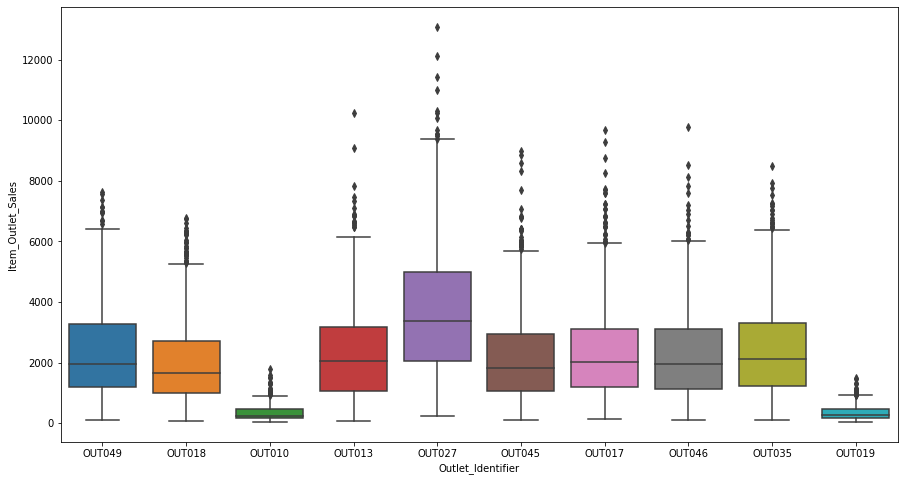

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x=train.Outlet_Identifier,y=train.Item_Outlet_Sales)

In [38]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [39]:
train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].describe().T

Item_Fat_Content,LF,Low Fat,Regular,low fat,reg
count,316.000000,5089.000000,2889.000000,112.000000,117.000000
mean,2073.551928,2164.477336,2235.186702,2087.740737,1962.192268
std,1535.282582,1706.599391,1727.715941,1747.723146,1543.170658
min,40.613800,33.290000,33.955800,83.890800,37.950600
25%,729.051000,826.923600,860.213600,912.146000,798.960000
50%,1797.660000,1765.701600,1845.597600,1614.232100,1492.723600
75%,2990.107800,3057.353600,3219.808800,2753.415900,2821.660400
max,7503.566000,13086.964800,12117.560000,9562.219600,7833.802800


In [40]:
train.groupby('Item_Identifier')['Item_Weight'].mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
DRB24     8.785
DRB25    12.300
DRB48    16.750
DRC01     5.920
DRC12    17.850
DRC13     8.260
DRC24    17.850
DRC25     5.730
DRC27    13.800
DRC36    13.000
DRC49     8.670
DRD01    12.100
DRD12     6.960
DRD13    15.000
DRD15    10.600
DRD24    13.850
DRD25     6.135
DRD27    18.750
DRD37     9.800
DRD49     9.895
DRD60    15.700
DRE01    10.100
DRE03    19.600
DRE12     4.590
DRE13     6.280
          ...  
NCX05    15.200
NCX06    17.600
NCX17    21.250
NCX18    14.150
NCX29    10.000
NCX30    16.700
NCX41    19.000
NCX42     6.360
NCX53    20.100
NCX54     9.195
NCY05    13.500
NCY06    15.250
NCY17    18.200
NCY18     7.285
NCY29    13.650
NCY30    20.250
NCY41    16.750
NCY42     6.380
NCY53    20.000
NCY54     8.430
NCZ05     8.485
NCZ06    19.600
NCZ17    12.150
NCZ18     7.825
NCZ29    15.000
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: It

In [41]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:

data['Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean())) 
 

In [43]:
data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [44]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

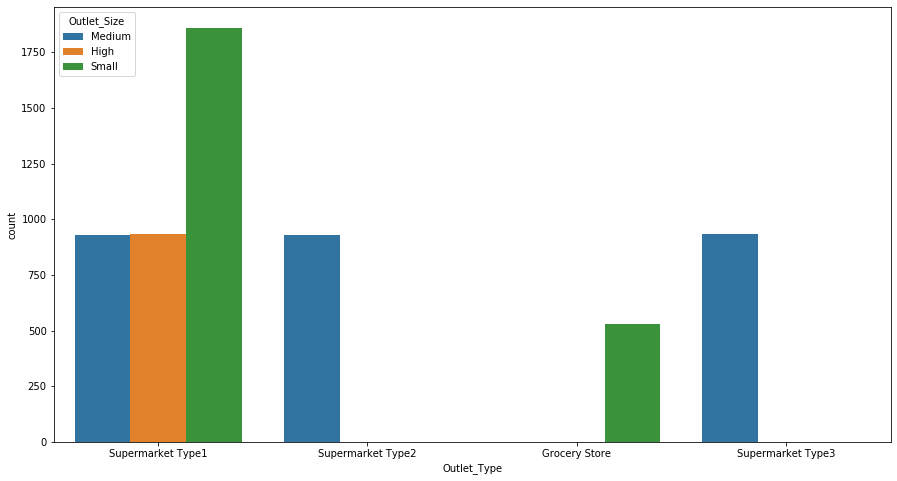

In [45]:
plt.figure(figsize=(15,8))
sns.countplot(train.Outlet_Type,hue=train.Outlet_Size)

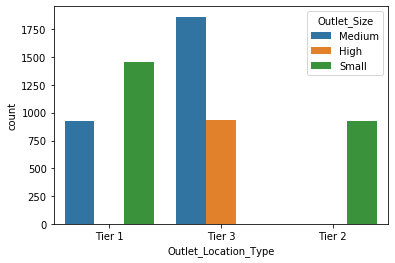

In [46]:
sns.countplot(train.Outlet_Location_Type,hue=train.Outlet_Size)

In [47]:
data.groupby("Outlet_Size")["Outlet_Location_Type"].value_counts()

Outlet_Size  Outlet_Location_Type
High         Tier 3                  1553
Medium       Tier 3                  3105
             Tier 1                  1550
Small        Tier 1                  2430
             Tier 2                  1550
Name: Outlet_Location_Type, dtype: int64

In [48]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [49]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].apply(lambda x:x.mode())

Outlet_Location_Type  Outlet_Type         
Tier 1                Grocery Store      0     Small
                      Supermarket Type1  0    Medium
                                         1     Small
Tier 2                Supermarket Type1  0     Small
Tier 3                Supermarket Type1  0      High
                      Supermarket Type2  0    Medium
                      Supermarket Type3  0    Medium
Name: Outlet_Size, dtype: object

In [50]:
data[(data.Outlet_Location_Type=='Tier 2')&(data.Outlet_Type=='Supermarket Type1')].isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3091
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            1856
dtype: int64

In [51]:
#data['Item_Weight']=data.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean())) 
#data['Outlet_Size']=data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].transform(lambda x:x.fillna(x.mode()))

In [52]:
data[(data['Outlet_Type']=='Supermarket Type3')&(data['Outlet_Location_Type']=='Tier 3')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
36,FDV20,20.200,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,6.385,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,15.250,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
62,FDF09,6.215,Low Fat,0.012090,Fruits and Vegetables,38.2848,OUT027,1985,Medium,Tier 3,Supermarket Type3,484.7024
64,FDY45,17.500,Low Fat,0.026016,Snack Foods,255.8356,OUT027,1985,Medium,Tier 3,Supermarket Type3,2543.3560
84,FDR12,12.600,Regular,0.031382,Baking Goods,171.3764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3091.9752
87,FDQ49,20.200,Regular,0.039058,Breakfast,155.9630,OUT027,1985,Medium,Tier 3,Supermarket Type3,3285.7230


In [53]:
#data[]

In [54]:
data.loc[(data.Outlet_Location_Type=='Tier 3')&(data.Outlet_Type=='Grocery Store'),"Outlet_Size"]='Small'

In [55]:
data.loc[(data['Outlet_Type']=='Supermarket Type1')&(data['Outlet_Location_Type']=='Tier 2'),"Outlet_Size"]='Small'

In [56]:
data[data['Outlet_Size'].isna()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [57]:
data.Outlet_Size.unique()

array(['Medium', 'Small', 'High'], dtype=object)

In [58]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [59]:
idlist = []
for i in data.Item_Identifier:
    idlist.append(str(i)[:2])
    
# combined.Item_Identifier.str[:3]

In [60]:
data["Item_Id"] = pd.Series(idlist)

In [61]:
data.Item_Id.unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [62]:
data.Item_Weight.nunique()

628

In [63]:
'''def weight_id(x):
    if(x<=6):
        return("4-6")
    elif((x<=10) and (x>6)):
        return("10-6")
    elif((x<=13) and (x>10)):
        return("13-10")
    elif((x<=15.5) and (x>13)):
        return("15.5-13")
    elif((x<=17.5) and (x>15.5)):
        return("17.5-15.5")
    elif((x<=20.5) and (x>17.5)):
        return("20.5-17.5")
    else:
        return("20.5-22")'''

'def weight_id(x):\n    if(x<=6):\n        return("4-6")\n    elif((x<=10) and (x>6)):\n        return("10-6")\n    elif((x<=13) and (x>10)):\n        return("13-10")\n    elif((x<=15.5) and (x>13)):\n        return("15.5-13")\n    elif((x<=17.5) and (x>15.5)):\n        return("17.5-15.5")\n    elif((x<=20.5) and (x>17.5)):\n        return("20.5-17.5")\n    else:\n        return("20.5-22")'

In [64]:
#data['Weight_ID'] = data.Item_Weight.apply(weight_id)

In [65]:
#data.groupby('Item_Id')['Weight_ID'].value_counts()

In [66]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Id                         0
dtype: int64

In [67]:
#data.columns

In [68]:
#data['Outlet_Establishment_Year'].value_counts()

In [69]:
#train['Outlet_Establishment_Year'].dtype

In [70]:
'''def Year_Group(x):
    if((x>=1980) and (x<1990)):
        return("1980 decade")
    elif((x>=1990) and (x<2000)):
        return("1990 decade")
    elif((x>=2000) and (x<2010)):
        return("2000 decade")
    else:
        return("Recent store")
    '''

'def Year_Group(x):\n    if((x>=1980) and (x<1990)):\n        return("1980 decade")\n    elif((x>=1990) and (x<2000)):\n        return("1990 decade")\n    elif((x>=2000) and (x<2010)):\n        return("2000 decade")\n    else:\n        return("Recent store")\n    '

In [71]:
#data['Year_Group'] = data.Outlet_Establishment_Year.apply(Year_Group)

In [72]:
data.Outlet_Establishment_Year=data.Outlet_Establishment_Year.astype('object')

In [73]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_Id                         0
dtype: int64

In [74]:
#------------------------

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
Item_Identifier              14204 non-null object
Item_Weight                  14204 non-null float64
Item_Fat_Content             14204 non-null object
Item_Visibility              14204 non-null float64
Item_Type                    14204 non-null object
Item_MRP                     14204 non-null float64
Outlet_Identifier            14204 non-null object
Outlet_Establishment_Year    14204 non-null object
Outlet_Size                  14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Type                  14204 non-null object
Item_Outlet_Sales            8523 non-null float64
Item_Id                      14204 non-null object
dtypes: float64(4), object(9)
memory usage: 1.4+ MB


In [76]:
traindata = data.loc[0:8522]
testdata = data.loc[8523:]

In [77]:
traindata.shape

(8523, 13)

In [78]:
testdata.shape

(5681, 13)

In [79]:
traindata.drop(['Item_Identifier','Item_Visibility','Item_Weight',],axis=1,inplace=True)

C:\Users\Navika\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [80]:
testdata.drop(['Item_Identifier','Item_Outlet_Sales','Item_Visibility','Item_Weight'],axis=1,inplace=True)

In [81]:
traindummy = pd.get_dummies(traindata)

In [82]:
testdummy = pd.get_dummies(testdata)

In [83]:
traindummy = traindummy.transform(lambda x: x**0.5)

In [84]:
testdummy = testdummy.transform(lambda x: x**0.5)

In [85]:
traindummy.shape

(8523, 52)

In [86]:
testdummy.shape

(5681, 51)

In [87]:
for x in traindummy.columns:
    if(x not in testdummy.columns):
        print(x)

Item_Outlet_Sales


In [88]:
#Upper_limit = 3101.296400 + 1.5 * (3101.296400-834.247400)

In [89]:
#Upper_limit

In [90]:
#newtrain = newtrain[newtrain['Item_Outlet_Sales']<=Upper_limit]

In [91]:
traindummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 52 columns):
Item_MRP                           8523 non-null float64
Item_Outlet_Sales                  8523 non-null float64
Item_Fat_Content_Low Fat           8523 non-null float64
Item_Fat_Content_Regular           8523 non-null float64
Item_Type_Baking Goods             8523 non-null float64
Item_Type_Breads                   8523 non-null float64
Item_Type_Breakfast                8523 non-null float64
Item_Type_Canned                   8523 non-null float64
Item_Type_Dairy                    8523 non-null float64
Item_Type_Frozen Foods             8523 non-null float64
Item_Type_Fruits and Vegetables    8523 non-null float64
Item_Type_Hard Drinks              8523 non-null float64
Item_Type_Health and Hygiene       8523 non-null float64
Item_Type_Household                8523 non-null float64
Item_Type_Meat                     8523 non-null float64
Item_Type_Others                   852

In [92]:
traindummy.columns

Index(['Item_MRP', 'Item_Outlet_Sales', 'Item_Fat_Content_Low Fat',
       'Item_Fat_Content_Regular', 'Item_Type_Baking Goods',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Establishment_Year_1985', 'Outlet_Establishment_Year_1987',
       'Outlet_Establishment_Year_1997', 'Outlet_Establishment_Year_1998',
     

In [93]:
testdummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 8523 to 14203
Data columns (total 51 columns):
Item_MRP                           5681 non-null float64
Item_Fat_Content_Low Fat           5681 non-null float64
Item_Fat_Content_Regular           5681 non-null float64
Item_Type_Baking Goods             5681 non-null float64
Item_Type_Breads                   5681 non-null float64
Item_Type_Breakfast                5681 non-null float64
Item_Type_Canned                   5681 non-null float64
Item_Type_Dairy                    5681 non-null float64
Item_Type_Frozen Foods             5681 non-null float64
Item_Type_Fruits and Vegetables    5681 non-null float64
Item_Type_Hard Drinks              5681 non-null float64
Item_Type_Health and Hygiene       5681 non-null float64
Item_Type_Household                5681 non-null float64
Item_Type_Meat                     5681 non-null float64
Item_Type_Others                   5681 non-null float64
Item_Type_Seafood                 

In [94]:
testdummy.isnull().sum()

Item_MRP                           0
Item_Fat_Content_Low Fat           0
Item_Fat_Content_Regular           0
Item_Type_Baking Goods             0
Item_Type_Breads                   0
Item_Type_Breakfast                0
Item_Type_Canned                   0
Item_Type_Dairy                    0
Item_Type_Frozen Foods             0
Item_Type_Fruits and Vegetables    0
Item_Type_Hard Drinks              0
Item_Type_Health and Hygiene       0
Item_Type_Household                0
Item_Type_Meat                     0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_Type_Snack Foods              0
Item_Type_Soft Drinks              0
Item_Type_Starchy Foods            0
Outlet_Identifier_OUT010           0
Outlet_Identifier_OUT013           0
Outlet_Identifier_OUT017           0
Outlet_Identifier_OUT018           0
Outlet_Identifier_OUT019           0
Outlet_Identifier_OUT027           0
Outlet_Identifier_OUT035           0
Outlet_Identifier_OUT045           0
O

In [95]:
x = traindummy.drop(['Item_Outlet_Sales'],axis=1)
y = traindummy['Item_Outlet_Sales']

In [96]:
# splitting data as X_train and X_test
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2,random_state = 123)

In [97]:
# Building the first model with all the features
from sklearn.linear_model import LinearRegression
# instantiate
lm = LinearRegression(normalize=False)

# fit
from sklearn.metrics import r2_score
pred = lm.fit(xtrain,ytrain).predict(xtest)

In [98]:
print(r2_score(y_true=ytest, y_pred=pred))

0.6695169496412605


In [99]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(ytest,pred)
lr_rmse_score=np.sqrt(mse)
print(lr_rmse_score)

10.591506924626104


In [100]:
# Building the first model with all the features
from sklearn.linear_model import LinearRegression
# instantiate
lm = LinearRegression()

# fit # predict 
pred_lr = lm.fit(xtrain, ytrain).predict(testdummy)

In [101]:
print(f'R^2 score:{lm.score(x,y)}')

R^2 score:0.6623845029567073


In [102]:
print(f'R^2 score:{lm.score(xtrain,ytrain)}')

R^2 score:0.6605084778847541


In [103]:
print(f'R^2 score:{lm.score(xtest,ytest)}')

R^2 score:0.6695169496412605


In [104]:
import statsmodels.api as sm
X_constant = sm.add_constant(xtest)
model = sm.OLS(ytest, X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

C:\Users\Navika\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     128.9
Date:                Wed, 08 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:12:22   Log-Likelihood:                -6429.6
No. Observations:                1705   AIC:                         1.292e+04
Df Residuals:                    1677   BIC:                         1.307e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.8539      0.388     -2.203      0.028      -1.614      -0.094
Item_MRP                            3.6897      0.094     39.117      0.000       3.505       3.875
Item_Fat_Content_Low Fat           -0.6274      0.335     -1.876      0.061      -1.284       0.029
Item_Fat_Content_Regular           -0.2265      0.378     -0.600      0.549      -0.967       0.514
Item_Type_Baking Goods             -0.8901      1.094     -0.814      0.416      -3.035       1.255
Item_Type_Breads                    0.4170      1.643      0.254      0.800      -2.805       3.639
Item_Type_Breakfast                -0.9051      2.224     -0.407      0.684      -5.268       3.458
Item_Type_Canned                   -1.0116      1.008     -1.003      0.316      -2.989       0.966
Item_Type_Dairy                    -2.1071      0.991     -2.127      0.034      -4.050      -0.164
Item_Type_Frozen Foods             -0.9043      0.946     -0.956      0.339      -2.760       0.952
Item_Type_Fruits and Vegetables    -1.1820      0.854     -1.384      0.167      -2.857       0.493
Item_Type_Hard Drinks               4.0003      2.395      1.670      0.095      -0.697       8.698
Item_Type_Health and Hygiene        0.0141      1.009      0.014      0.989      -1.964       1.992
Item_Type_Household                -0.7330      0.869     -0.843      0.399      -2.438       0.972
Item_Type_Meat                      0.1923      1.185      0.162      0.871      -2.132       2.517
Item_Type_Others                    0.7297      1.565      0.466      0.641      -2.340       3.800
Item_Type_Seafood                  -1.4333      2.601     -0.551      0.582      -6.534       3.667
Item_Type_Snack Foods              -0.3647      0.861     -0.424      0.672      -2.053       1.323
Item_Type_Soft Drinks               1.2334      2.195      0.562      0.574      -3.072       5.539
Item_Type_Starchy Foods             2.0903      1.919      1.089      0.276      -1.674       5.854
Outlet_Identifier_OUT010           -4.4719      0.289    -15.476      0.000      -5.039      -3.905
Outlet_Identifier_OUT013           -0.5673      0.212     -2.676      0.008      -0.983      -0.152
Outlet_Identifier_OUT017            1.1136      0.337      3.304      0.001       0.453       1.775
Outlet_Identifier_OUT018           -1.1982      0.231     -5.189      0.000      -1.651      -0.745
Outlet_Identifier_OUT019           -5.9677      0.337    -17.728      0.000      -6.628      -5.307
Outlet_Identifier_OUT027            6.1668      0.231     26.734      0.000       5.714       6.619
Outlet_Identifier_OUT035            1.1304      0.321      3.526      0.000       0.502       1.759
Outlet_Identifier_OUT045            0.0643      0.324      0.199      0.843      -0

In [105]:
sns.set(style = 'whitegrid')

residuals = model.resid
residuals

4532    -5.724871
186      3.468626
7557   -23.181910
6308    -4.630259
7297     6.308050
2711   -11.891242
7374     1.129669
714     -9.689173
2886     4.284089
7559    -4.553821
6568    22.279482
7176    -5.999339
6320     2.141888
8489    11.042523
426     17.878204
5509   -10.443671
8297    -1.309464
1796    -1.446509
6929     9.955212
1173    15.721282
2895    -0.435759
2633    -2.187099
878     -7.824901
8196   -18.745421
7974    -9.570272
3494    19.666586
1831    -5.705069
2134   -22.710592
5444    12.846662
1012    22.003241
          ...    
3585   -11.985411
5243     1.806699
6420    17.515585
2453    -6.915845
6575     2.460385
374      1.698594
4031     7.443464
3249   -11.600267
4881     2.378485
3241    12.249460
11       1.381483
8478    25.211434
4369   -18.274347
271    -14.128542
7744    -8.869188
1254    25.757805
5703    -4.592403
2139    -9.517791
6278     8.114197
3973    -3.969013
6574     3.196922
1074    16.394897
1085     8.676501
3746   -12.341546
1878    -0

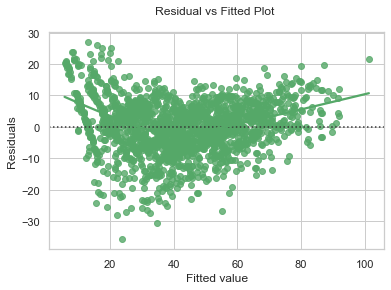

In [106]:
ax = sns.residplot(ytest, residuals, lowess = True, color = 'g')
ax.set(xlabel = 'Fitted value', ylabel = 'Residuals', title = 'Residual vs Fitted Plot \n')
plt.show()

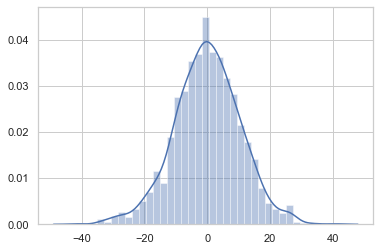

In [107]:
sns.distplot(residuals)

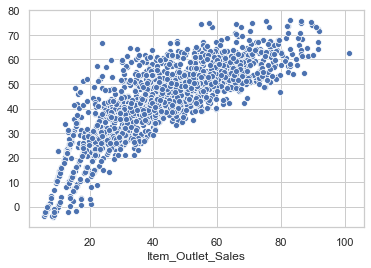

In [108]:
sns.scatterplot(ytest, pred)

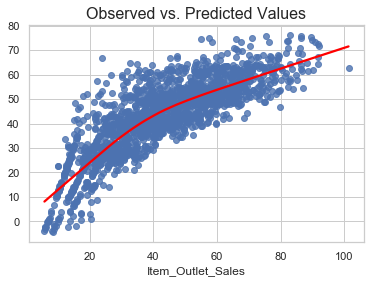

In [109]:
sns.regplot(x=ytest, y=pred, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel='Predicted'
plt.ylabel='Observed'

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
pred_dtr=dtr.predict(xtest)

In [111]:
print(r2_score(y_true=ytest, y_pred=pred_dtr))
print(f'R^2 score:{dtr.score(xtrain,ytrain)}')
print(f'R^2 score:{dtr.score(xtest,ytest)}')

0.3330042827325639
R^2 score:0.9995653668289124
R^2 score:0.3330042827325639


In [112]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
pred_dtr2=dtr.predict(testdummy)

In [113]:
'''from sklearn.model_selection import cross_val_score
rmse = cross_val_score(dtr, x, y, scoring='neg_mean_squared_error', cv = 10)
print(-(rmse))
#get the mean of each fold 
print("Accuracy of Model with Cross Validation is:",(-(rmse)).mean())'''

'from sklearn.model_selection import cross_val_score\nrmse = cross_val_score(dtr, x, y, scoring=\'neg_mean_squared_error\', cv = 10)\nprint(-(rmse))\n#get the mean of each fold \nprint("Accuracy of Model with Cross Validation is:",(-(rmse)).mean())'

In [114]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_rf=rf.predict(xtest)

C:\Users\Navika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [115]:
print(r2_score(y_true=ytest, y_pred=pred_rf))
print(f'R^2 score:{rf.score(xtrain,ytrain)}')
print(f'R^2 score:{rf.score(xtest,ytest)}')

0.5952392586604895
R^2 score:0.9269905196273964
R^2 score:0.5952392586604895


In [116]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
pred_rf2=rf.predict(testdummy)

C:\Users\Navika\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [117]:
'''random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}'''
#after hyper parameter tuning we get:
random_grid = {'n_estimators': [1000],
 'min_samples_split': [10],
 'min_samples_leaf':[ 4],
 'max_features': ['auto'],
 'max_depth': [10],
 'bootstrap': [True]}

In [118]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=123, n_jobs = -1)

In [119]:
rf_random.fit(xtrain,ytrain )

C:\Users\Navika\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   26.3s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=None,

In [120]:
'''rf_random.fit(xtrain,ytrain )

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=N...
                   iid='warn', n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   pre_dispatch='2*n_jobs', random_state=123, refit=True,
                   return_train_score=False, scoring=None, verbose=2)'''


"rf_random.fit(xtrain,ytrain )\n\nRandomizedSearchCV(cv=3, error_score='raise-deprecating',\n                   estimator=RandomForestRegressor(bootstrap=True,\n                                                   criterion='mse',\n                                                   max_depth=None,\n                                                   max_features='auto',\n                                                   max_leaf_nodes=None,\n                                                   min_impurity_decrease=0.0,\n                                                   min_impurity_split=None,\n                                                   min_samples_leaf=1,\n                                                   min_samples_split=2,\n                                                   min_weight_fraction_leaf=0.0,\n                                                   n_estimators=10, n_jobs=None,\n                                                   oob_score=False,\n                      

In [121]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [122]:
def evaluate(model, train_features, train_labels, test_features,test_labels):
    predictions = model.fit(xtrain,ytrain).predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [123]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, xtrain,ytrain,xtest,ytest)

Model Performance
Average Error: 8.0955 degrees.
Accuracy = 77.33%.


In [124]:
pred_rf_hyp = best_random.predict(testdummy)

In [125]:
print(rf.score(testdummy,pred_rf_hyp))

0.9175040706563493


In [126]:
import xgboost as xgb

In [127]:
from xgboost.sklearn import XGBRegressor 
xgb=XGBRegressor() 
preds_xgb=xgb.fit(xtrain,ytrain).predict(xtest)

C:\Users\Navika\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[19:13:26] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [128]:
print(r2_score(y_true=ytest, y_pred=preds_xgb))
print(f'R^2 score:{xgb.score(xtrain,ytrain)}')
print(f'R^2 score:{xgb.score(xtest,ytest)}')

0.681863432516209
R^2 score:0.6940314580284577
R^2 score:0.681863432516209


In [129]:
from xgboost.sklearn import XGBRegressor 
xgb=XGBRegressor() 
preds_xgb2=xgb.fit(xtrain,ytrain).predict(testdummy)

[19:13:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\Navika\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


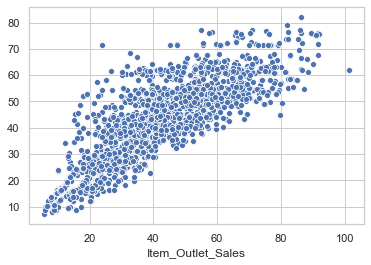

In [130]:
sns.scatterplot(ytest, preds_xgb)

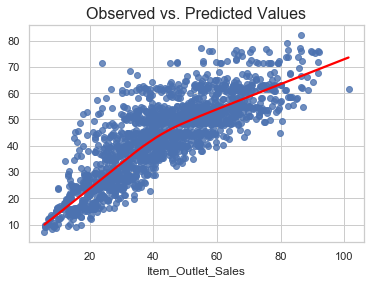

In [131]:
sns.regplot(x=ytest, y=preds_xgb, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
plt.xlabel='Predicted'
plt.ylabel='Observed'


In [132]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
pred_gbm=gbm.fit(xtrain,ytrain).predict(xtest)
r2_score(ytest,pred_gbm)

0.6801472338343798

In [133]:
print(r2_score(y_true=ytest, y_pred=pred_gbm))
print(f'R^2 score:{gbm.score(xtrain,ytrain)}')
print(f'R^2 score:{gbm.score(xtest,ytest)}')
print(f'R^2 score:{gbm.score(x,y)}')

0.6801472338343798
R^2 score:0.695274960683354
R^2 score:0.6801472338343798
R^2 score:0.6922818724680493


In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gbm=GradientBoostingRegressor()
pred_gbm2=gbm.fit(xtrain,ytrain).predict(testdummy)


In [135]:
gradient_grid = {'learning_rate':[0.005],
                 'n_estimators':[1200],'max_depth':[9],
                'min_samples_split':[10],
                 'min_samples_leaf':[4], 
                 'subsample':[0.85],
                 'random_state':[12], 
                 'max_features':['auto'],
'warm_start':[True]}

In [136]:
from sklearn.model_selection import RandomizedSearchCV
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = gradient_grid, n_iter = 100, cv = 5, verbose=2, random_state=123, n_jobs = -1)

In [137]:
gbm_random.fit(xtrain,ytrain)

C:\Users\Navika\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  1.2min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.2min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [138]:
gbm_random.best_params_

{'warm_start': True,
 'subsample': 0.85,
 'random_state': 12,
 'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 9,
 'learning_rate': 0.005}

In [139]:
def evaluate(model, train_features, train_labels, test_features,test_labels):
    predictions = model.fit(xtrain,ytrain).predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [140]:
best_gradient = gbm_random.best_estimator_
gradient_accuracy = evaluate(best_gradient,xtrain,ytrain ,xtest,ytest)

Model Performance
Average Error: 8.2246 degrees.
Accuracy = 77.00%.


In [141]:
pred_gbm3=best_gradient.predict(testdummy)

In [142]:
#dummytest.shape

In [180]:
solution = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                        "Outlet_Identifier":test.Outlet_Identifier,
                        "Item_Outlet_Sales":pred_gbm2**2})

In [181]:
#Solution 1 gave the lowest rmse, but then our accuracy takes hit

In [182]:
solution.to_csv("GBM Model Navika6.csv", index = False) #1153 for GradietBoost
#solution.to_csv("GBM Model Navika6.csv", index = False) #1170 for Random Forest Tuning

In [183]:
cd

C:\Users\Navika


In [148]:
#pip install yellowbrick

In [149]:
testdummy.shape

(5681, 51)

In [150]:
from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,46)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 18
Score with 18 features: 0.670100


In [151]:
cols = list(x.columns)
model = GradientBoostingRegressor()
#Initializing RFE model
rfe = RFE(model, 15)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = x.columns)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Item_MRP', 'Item_Type_Breakfast', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Household', 'Item_Type_Seafood', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Establishment_Year_1985',
       'Outlet_Establishment_Year_2002', 'Outlet_Establishment_Year_2007',
       'Outlet_Establishment_Year_2009', 'Outlet_Location_Type_Tier 2',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Type3'],
      dtype='object')


### from sklearn.feature_selection import RFE
#no of features
nof_list=np.arange(1,116)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 123)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

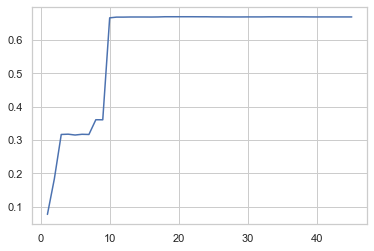

In [153]:
plt.plot(list(range(1,46)), score_list)

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

[variance_inflation_factor(xtrain.values, j) for j in range(1, xtrain.shape[1])]

C:\Users\Navika\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]